In [1]:
from postprocessingbyprojection import *
import matplotlib.pyplot as plt
from misc_func import set_size
from timeit import default_timer as timer
import funcformultiprocessing
import os
from multiprocessing import Pool

## A plot of $|V|+|A|$ as a function of number of jumps

In [2]:
max_size = 1000
gam = 0.03
np.random.seed(1)
sizes = np.arange(2, max_size)[::10]

if __name__ ==  '__main__':
    pool = Pool(processes = os.cpu_count() - 1)
    results = [pool.apply_async(funcformultiprocessing.size_DAG, args = (gam, size)) for size in sizes]
    r = [result.get() for result in results]
    pool.close()
    pool.join()

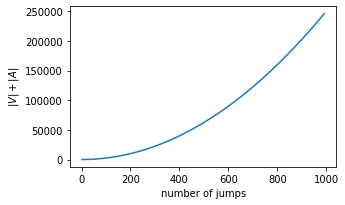

In [3]:
x = [result[1] for result in r]

plt.figure(figsize = set_size(width = 345, subplots = (1, 1)))
plt.plot(sizes, x)
plt.xlabel('number of jumps')
plt.ylabel('$|V|+|A|$')
plt.savefig('jumpsvsgraphsize.pdf')
plt.show()

## A plot of computation time as a function of $|V|+|A|$

In [ ]:
max_size = 1000
gam = 0.03
sizes = np.arange(2, max_size)[::10]

if __name__ ==  '__main__':
    pool = Pool(processes = os.cpu_count() - 1)
    results = [pool.apply_async(funcformultiprocessing.timing_mean_DAG, args = (gam, size)) 
               for size in sizes for keer in range(100)]
    r = [result.get() for result in results]
    pool.close()
    pool.join()

In [ ]:
from itertools import groupby
from operator import itemgetter

times_creation = [np.mean(list(list(zip(*g))[1])) for k, g in groupby(r, itemgetter(0))]
times_shortest = [np.mean(list(list(zip(*g))[2])) for k, g in groupby(r, itemgetter(0))]

plt.figure(figsize = set_size(width = 345, subplots = (1, 1)))
plt.plot(x, [times_creation[i] + times_shortest[i] for i in range(len(times_creation))])
plt.plot(x, times_shortest)
plt.plot(x, times_creation)
plt.xlabel('$|V|+|A|$')
plt.ylabel('time (s)')
plt.legend(['creation+shortest', 'shortest', 'creation'])
plt.savefig('creatplusshort.pdf')
plt.show()